## Analysis

In [20]:

import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
# from sklearn.utils import resample
import numpy as np

In [21]:
input_path = "Merging/Results"
input = os.path.join(input_path, "master_5.csv")


## Plots
### Kreuztabellen

In [22]:
columns_to_plot = [
    "SelbssicherUnsicher", "MutigAngstlich", "AuffaligUnauffalig", "ManipulativAufrichtig", 
    "MachtigMachtlos", "ExclusivDurchschnitt", "begehrenswertNicht", "BewundertNicht", 
    "PrivilegiertNicht", "WohlhabendNicht", "UberheblichDezent", "IntelligentSchlicht", 
    "EigennutzigUneigen", "VerschwenderischSpar", "MaterialistischIdealistisch", 
    "SpirituellNicht", "NaturverbundenNaturfern", "AuthentischKunstlich", 
    "EmpathischGefuhlskalt", "RomantischNicht", "FriedlichAggressiv", 
    "FreundlichUnfreundlich"
]

### Alter

/var/folders/14/q6smmykd721g4xgkp2my8d6c0000gn/T/ipykernel_86638/695713165.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = df.groupby(["Style", "Alter_Cat"]).size().reset_index(name="n")


<Axes: xlabel='Alter_Cat', ylabel='n'>

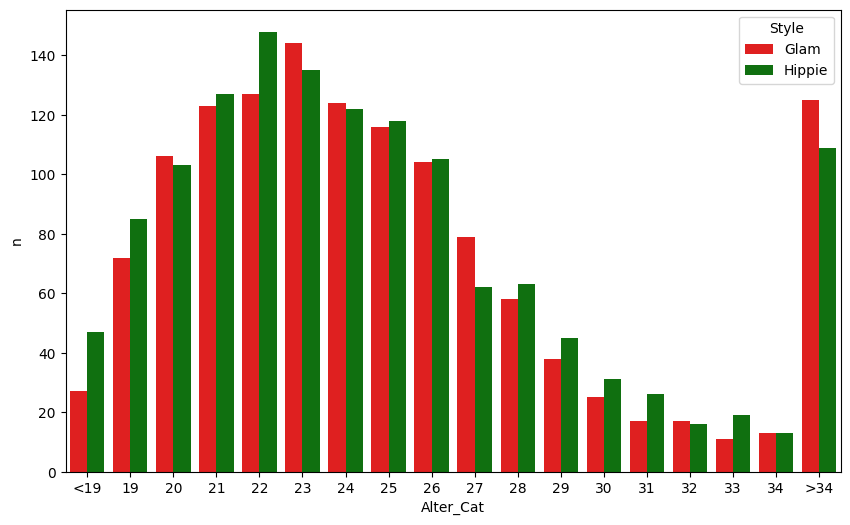

In [23]:
import pandas as pd
# Alterskategorien erstellen
df=pd.read_csv(input)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Alter_Cat"] = pd.cut(
    df["Age"],
    bins=[-float('inf'), 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, float('inf')],
    labels=["<19", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", ">34"]
)

# Gruppieren der Daten nach Alter und Style
age_distribution = df.groupby(["Style", "Alter_Cat"]).size().reset_index(name="n")

# Barplot erstellen
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_distribution,
    x="Alter_Cat",
    y="n",
    hue="Style",
    palette={"Glam": "red", "Hippie": "green"}
)







### Gender und Stile--Verteilung

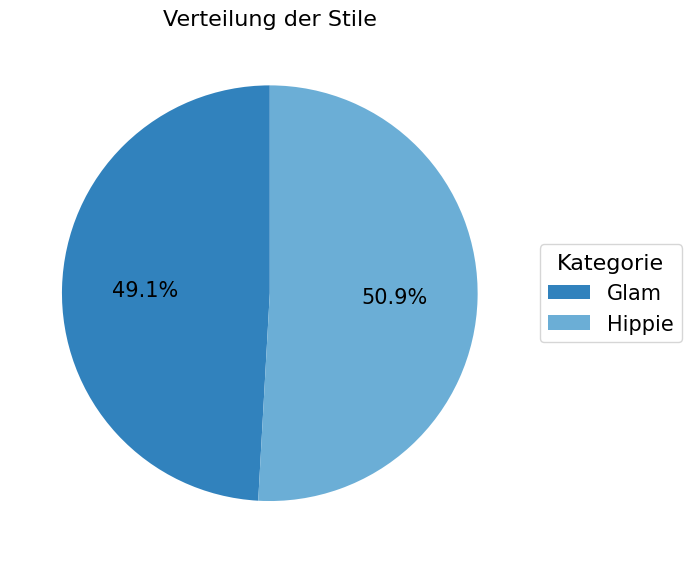

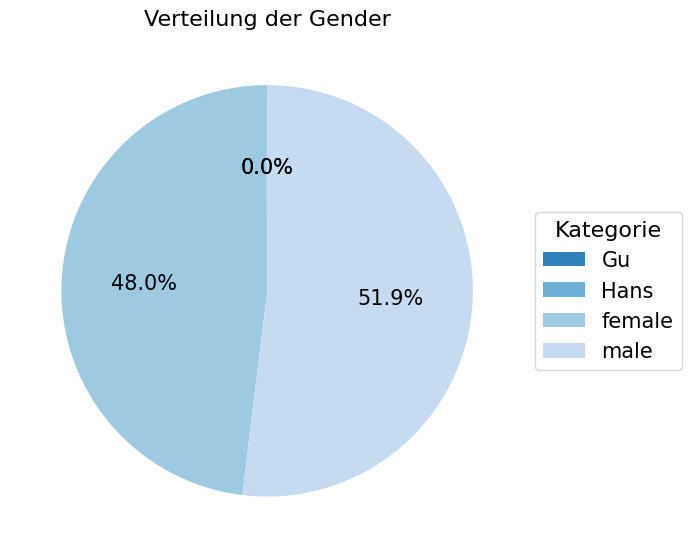

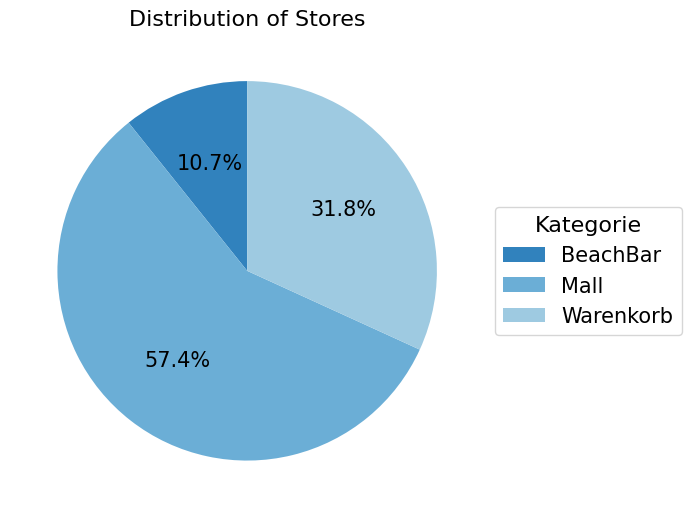

In [24]:
df = pd.read_csv(input)
df.columns = df.columns.str.strip()  # Spaltennamen säubern

# Funktion für besser lesbare Pie-Charts
def plot_pie_with_legend(data_series, title):
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        data_series,
        labels=None,  # Labels nicht direkt in den Plot
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("tab20c"),
        textprops={'fontsize': 15}
    )
    
    plt.legend(
        wedges,
        data_series.index,
        title="Kategorie",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=15,
        title_fontsize=16
    )
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Anwendungsbeispiele
plot_pie_with_legend(df['Style'].value_counts().sort_index(), "Verteilung der Stile")
plot_pie_with_legend(df['Gender'].value_counts().sort_index(), "Verteilung der Gender")
#plot_pie_with_legend(df['Condition'].value_counts().sort_index(), "Distribution of Conditions")
plot_pie_with_legend(df['Store'].value_counts().sort_index(), "Distribution of Stores")


### Assoziationsplot

Merging/Results/master_5.csv


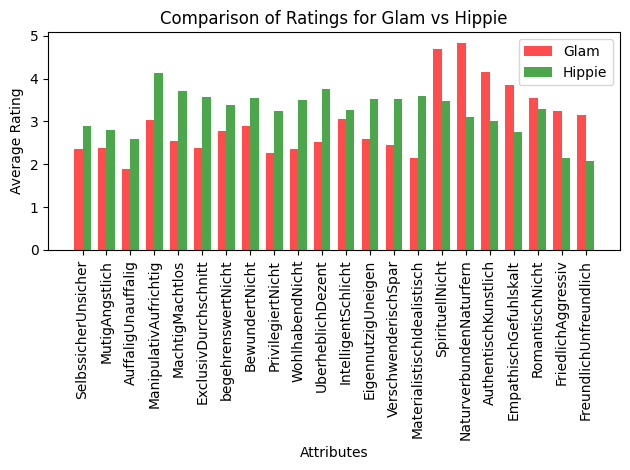

In [25]:
def plot_glam_vs_hippie_ratings(path, style_column, columns_to_plot):
    # Load the merged data
    df = pd.read_csv(path)
    print(path)

    # Filter rows for "glam" and "hippie"
    glam_df = df[df[style_column].str.contains("glam", case=False, na=False)]
    hippie_df = df[df[style_column].str.contains("hippie", case=False, na=False)]

    glam_means = glam_df[columns_to_plot].mean()
    hippie_means = hippie_df[columns_to_plot].mean()

    # Plot the data
    x = range(len(columns_to_plot))
    bar_width = 0.35

    plt.bar(x, glam_means, width=bar_width, label="Glam", color="red", alpha=0.7)
    plt.bar([pos + bar_width for pos in x], hippie_means, width=bar_width, label="Hippie", color="green", alpha=0.7)

    # Add labels and legend
    plt.xlabel("Attributes")
    plt.ylabel("Average Rating")
    plt.title("Comparison of Ratings for Glam vs Hippie")
    plt.xticks([pos + bar_width / 2 for pos in x], columns_to_plot, rotation=90)
    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage
#data_path = "/Users/caroline/Desktop/BaMarketing/15.11.Experiment/merged_data.csv"  

style_column = "Style"  

plot_glam_vs_hippie_ratings(input, style_column, columns_to_plot)

/var/folders/14/q6smmykd721g4xgkp2my8d6c0000gn/T/ipykernel_86638/2779526076.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels_left)


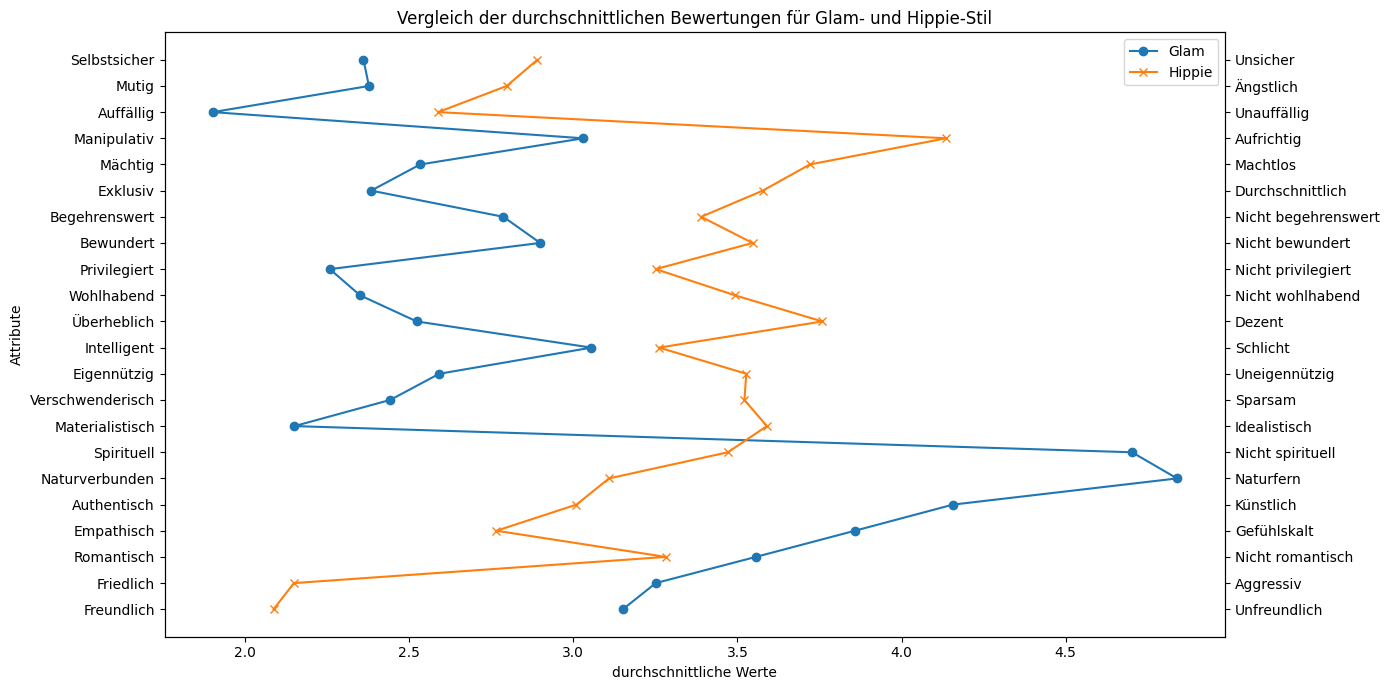

In [26]:
#Assoziationen
# Ensure the dataset is grouped by style and averages are calculated
df = pd.read_csv(input)
asso_merged_df = df

# Definiere die Spalten, die gemittelt werden sollen
# Liste der Spalten, die gemittelt werden sollen

# Mittelwerte pro Stil berechnen
mean_values = df.groupby('Style')[columns_to_plot].mean().T

# Plot erstellen
plt.figure(figsize=(14, 7))
ax1 = plt.gca()

# Linien für jeden Stil plotten
for style in ['Glam', 'Hippie']:
    if style in mean_values.columns:
        ax1.plot(mean_values[style], mean_values.index, label=style, marker='o' if style == 'Glam' else 'x')

# Achsenbeschriftung
ax1.set_xlabel('durchschnittliche Werte')
ax1.set_ylabel('Attribute')
ax1.set_title('Vergleich der durchschnittlichen Bewertungen für Glam- und Hippie-Stil')

# Zweite Y-Achse
ax2 = ax1.twinx()
ax2.set_yticks(ax1.get_yticks())
ax2.set_yticklabels(ax1.get_yticklabels())

# Achsen umdrehen
ax1.invert_yaxis()
ax2.invert_yaxis()

# Linke und rechte Beschriftungen
labels_left = [
    "Selbstsicher", "Mutig", "Auffällig", "Manipulativ", "Mächtig",
    "Exklusiv", "Begehrenswert", "Bewundert", "Privilegiert", "Wohlhabend",
    "Überheblich", "Intelligent", "Eigennützig", "Verschwenderisch",
    "Materialistisch", "Spirituell", "Naturverbunden", "Authentisch",
    "Empathisch", "Romantisch", "Friedlich", "Freundlich"
]

labels_right = [
    "Unsicher", "Ängstlich", "Unauffällig", "Aufrichtig", "Machtlos",
    "Durchschnittlich", "Nicht begehrenswert", "Nicht bewundert", "Nicht privilegiert", "Nicht wohlhabend",
    "Dezent", "Schlicht", "Uneigennützig", "Sparsam",
    "Idealistisch", "Nicht spirituell", "Naturfern", "Künstlich",
    "Gefühlskalt", "Nicht romantisch", "Aggressiv", "Unfreundlich"
]

# Setze die Labels
ax1.set_yticklabels(labels_left)
ax2.set_yticklabels(labels_right)

# Achsenlimits synchronisieren
ax2.set_ylim(ax1.get_ylim())

# Legende und Layout
ax1.legend()
plt.tight_layout()
plt.show()


### Income and Spending

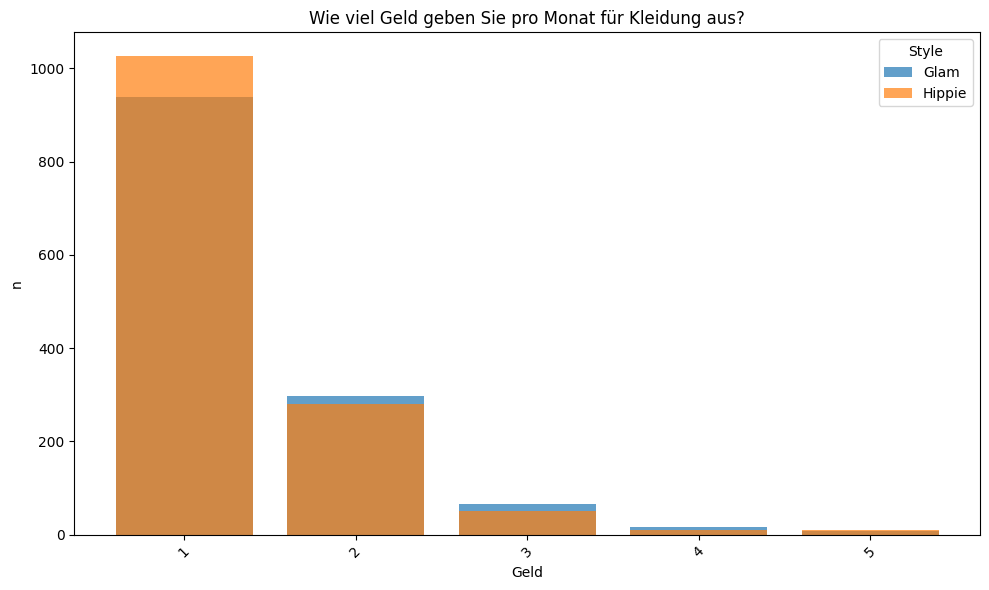

In [27]:


# Spaltennamen anpassen (ersetzen durch die tatsächlichen Spaltennamen)
column_name = "GeldProMonatKleidung"  # Ersetze dies durch die tatsächliche Spaltenüberschrift
df["Clothing_Expense_Category"] = df[column_name].map({
    0: "<100€",
    1: "101€-250€",
    2: "251€-500€",
    3: "501€-900€",
    4: ">900€"
})

# Gruppieren der Daten
clothing_expense_distribution = df.groupby(["Style", "GeldProMonatKleidung"]).size().reset_index(name="n")

# Plot erstellen
plt.figure(figsize=(10, 6))
for style, group_data in clothing_expense_distribution.groupby("Style"):
    plt.bar(
        group_data["GeldProMonatKleidung"],
        group_data["n"],
        label=style,
        alpha=0.7
    )

# Anpassung der Achsen und Titel
plt.xlabel("Geld")
plt.ylabel("n")
plt.title("Wie viel Geld geben Sie pro Monat für Kleidung aus?")
plt.xticks(rotation=45)
plt.legend(title="Style", loc="upper right")
plt.tight_layout()
plt.show()

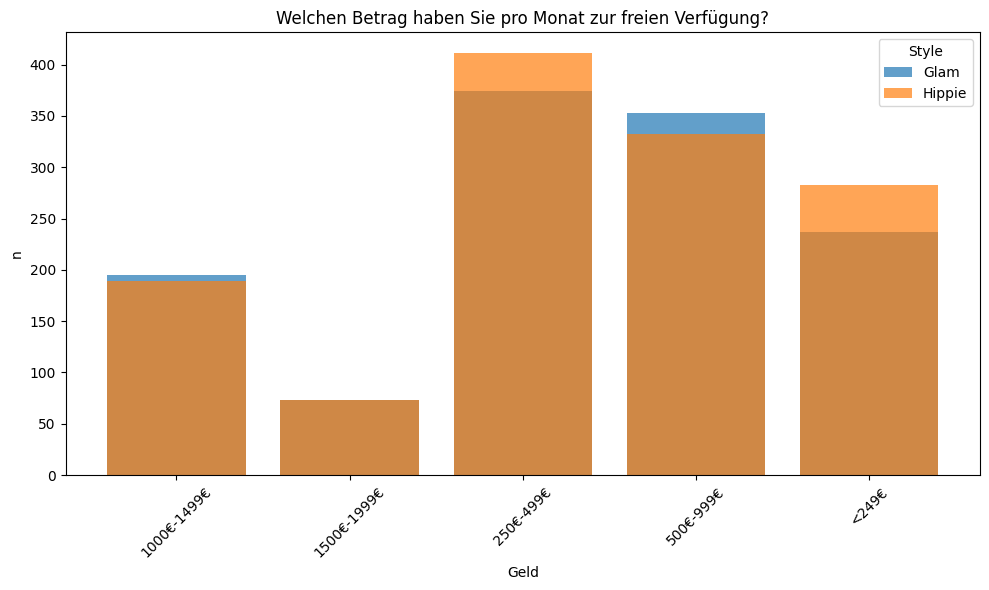

In [28]:


# Map column values (0-6) to categories
income_mapping = {
    1: "<249€",
    2: "250€-499€",
    3: "500€-999€",
    4: "1000€-1499€",
    5: "1500€-1999€",
    56: ">=2000€"
}

# Replace the values in the column with the mapped categories
df["Income_Cat"] = df["GeldProMonat"].map(income_mapping)

# Group data by Style and Income_Cat
income_distribution = df.groupby(["Style", "Income_Cat"]).size().reset_index(name="n")

# Plot the data
plt.figure(figsize=(10, 6))
for style in income_distribution["Style"].unique():
    style_data = income_distribution[income_distribution["Style"] == style]
    plt.bar(
        style_data["Income_Cat"],
        style_data["n"],
        label=style,
        alpha=0.7,
    )

plt.title("Welchen Betrag haben Sie pro Monat zur freien Verfügung?")
plt.xlabel("Geld")
plt.ylabel("n")
plt.legend(title="Style")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Spending according to style, store and gender 

## Warenkorb Scenario

### Kreuztabellen

In [29]:
import pandas as pd

df = pd.read_csv('Merging/Results/Master_5.csv')

# Kreuztabelle erstellen
kreuztabelle = pd.crosstab(index=df["Style"], columns=df["Gender"], margins=True, margins_name="sum")

# Optional: Achsenbeschriftungen für mehr Klarheit anpassen
kreuztabelle.index.name = "Style"
kreuztabelle.columns.name = "Gender"

# Excel-Datei speichern
output_path = 'Analysis/Results/Tables/Kreuztabelle.csv'
kreuztabelle.to_csv(output_path)

print(f"Kreuztabelle erfolgreich exportiert nach: {output_path}")


Kreuztabelle erfolgreich exportiert nach: Analysis/Results/Tables/Kreuztabelle.csv


## Skalen Konsistenz - Cronbachs Alpha - WIP per experiment

In [30]:
scales = {

    "Social Status_New": [
        "Scale_SocialStatus_1","Scale_SocialStatus_2","Scale_SocialStatus_3",
        "Scale_SocialStatus_4","Scale_SocialStatus_5","Scale_SocialStatus_6","Scale_SocialStatus_7",
    ],
    "Environmental_Concern": [
        "Scale_EnvironmentalConcern_1","Scale_EnvironmentalConcern_2",
        "Scale_EnvironmentalConcern_3","Scale_EnvironmentalConcern_4",
    ],
    "Materialism": [
        "Scale_Materialism_1","Scale_Materialism_2","Scale_Materialism_3","Scale_Materialism_4",
    ],
    "Green_Values": [
        "Scale_GreenValueScale_1","Scale_GreenValueScale_2","Scale_GreenValueScale_3",
        "Scale_GreenValueScale_4","Scale_GreenValueScale_5","Scale_GreenValueScale_6",
    ],
    "Social_Confidence": [
        "Scale_SocialConfidence_1","Scale_SocialConfidence_2","Scale_SocialConfidence_3",
        "Scale_SocialConfidence_4","Scale_SocialConfidence_5",
    ],
    "Need_for_Differentiation": [
        "Scale_Differentiation_1","Scale_Differentiation_2","Scale_Differentiation_3",
    ],
    "Altruism": [
        "Scale_Altruism_1","Scale_Altruism_2","Scale_Altruism_3","Scale_Altruism_4",
    ],
    "Empathy": [
        "Scale_Empathy_1","Scale_Empathy_2","Scale_Empathy_3","Scale_Empathy_4",
    ],
    "Egoism": [
        "Scale_Egoism_1","Scale_Egoism_2","Scale_Egoism_3",
        "Scale_Egoism_4","Scale_Egoism_5","Scale_Egoism_6",
    ],
    
    
}
# Function to calculate Cronbach's alpha
def calculate_cronbach_alpha(data):
    item_variances = data.var(axis=0, ddof=1)
    total_variance = data.sum(axis=1).var(ddof=1)
    n_items = data.shape[1]
    
    cronbach_alpha = (n_items / (n_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return cronbach_alpha



# Clean data: Convert all scale-related columns to numeric and handle invalid entries

def calculate_ca_perStore(store):
    data = pd.read_csv("Merging/Results/Merged_2_filtered.csv")

    data = data[data["Store"] == store]
    for scale_name, items in scales.items():
        for item in items:
            if item in data.columns:
                # Attempt to convert to numeric; set errors='coerce' to replace invalid values with NaN
                data[item] = pd.to_numeric(data[item], errors='coerce')

    # Recalculate Cronbach's Alpha for the scales
    cronbach_alpha_results_cleaned = {}
    for scale_name, items in scales.items():
        if all(item in data.columns for item in items):
            scale_data = data[items].dropna()  # Drop rows with missing values
            alpha = calculate_cronbach_alpha(scale_data)
            cronbach_alpha_results_cleaned[scale_name] = alpha
        else:
            cronbach_alpha_results_cleaned[scale_name] = "Missing items in dataset"

    print("--------- Cronbach's Alpha for " + store + "------------")
    # Display the results
    for scale, alpha in cronbach_alpha_results_cleaned.items():
        print(f"Scale: {scale} : {alpha}")



stores = ["Warenkorb", "BeachBar", "Mall"]

for store in stores: 
    calculate_ca_perStore(store)
    

--------- Cronbach's Alpha for Warenkorb------------
Scale: Social Status_New : 0.902473147866968
Scale: Environmental_Concern : 0.8434993712363388
Scale: Materialism : 0.8174607114338199
Scale: Green_Values : 0.9218154787623587
Scale: Social_Confidence : 0.7469878937881914
Scale: Need_for_Differentiation : 0.7805357807075551
Scale: Altruism : nan
Scale: Empathy : nan
Scale: Egoism : nan
--------- Cronbach's Alpha for BeachBar------------
Scale: Social Status_New : 0.8563887836456544
Scale: Environmental_Concern : 0.8420234480688171
Scale: Materialism : nan
Scale: Green_Values : 0.9121907375693978
Scale: Social_Confidence : nan
Scale: Need_for_Differentiation : nan
Scale: Altruism : 0.6279806259314455
Scale: Empathy : 0.8366885196508115
Scale: Egoism : 0.8107914929933782
--------- Cronbach's Alpha for Mall------------
Scale: Social Status_New : 0.9074499010631955
Scale: Environmental_Concern : 0.8302847440522367
Scale: Materialism : nan
Scale: Green_Values : 0.9171230196344743
Scale: S

### Spending Behavior

Spending Summary Style x Gender
   Experiment_Type   Style  Gender  Average_totalSpent
0              W_G    Glam  female              235.75
1              W_G    Glam    male              262.23
2              W_G  Hippie  female              120.44
3              W_G  Hippie    male              340.04
4            W_GHE    Glam  female              282.34
5            W_GHE    Glam    male              469.08
6            W_GHE  Hippie  female              681.85
7            W_GHE  Hippie    male              389.22
8              W_H    Glam  female              224.18
9              W_H    Glam    male              617.96
10             W_H  Hippie  female              157.29
11             W_H  Hippie    male              243.96
12           W_HGE    Glam  female              646.70
13           W_HGE    Glam    male              464.57
14           W_HGE  Hippie  female              196.63
15           W_HGE  Hippie    male              323.54
16             W_N    Glam  femal

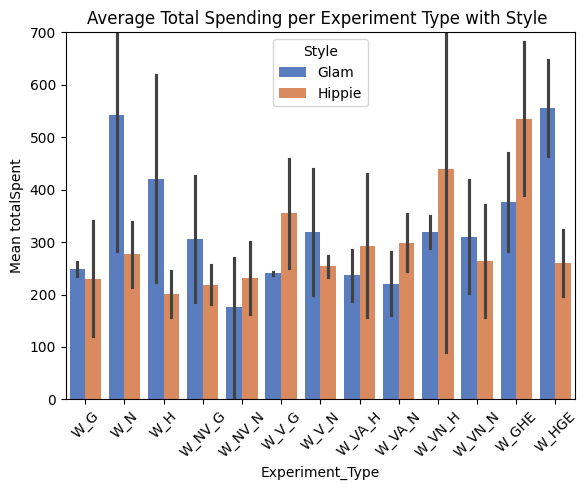

In [31]:
df = pd.read_csv(input)

wk = df[df["Store"] == "Warenkorb"]
wk2 = df[df["Store"] == "Warenkorb"]

spending_summary_gender = (
    wk.groupby(["Experiment_Type", "Style", "Gender"])["totalSpent"]
    .mean()
    .reset_index()
    .rename(columns={"totalSpent": "Average_totalSpent"})

)

spending_summary_gender["Average_totalSpent"] = spending_summary_gender["Average_totalSpent"].round(2)

exp_order   = ["W_G", "W_N", "W_H", "W_NV_G", "W_NV_N", "W_V_G", "W_V_N", "W_VA_H", "W_VA_N", "W_VN_H", "W_VN_N", "W_GHE", "W_HGE"]   
print("Spending Summary Style x Gender")
print(spending_summary_gender)

spending_summary = (
    wk.groupby(["Experiment_Type", "Style"])["totalSpent"]
    .mean()
    .reset_index()
    .rename(columns={"totalSpent": "Average_totalSpent"})

)
spending_summary["Average_totalSpent"] = spending_summary_gender["Average_totalSpent"].round(2)


spending_summary.to_csv("Analysis/Results/Spending_Summary", index=False)

print("Spending Summary Style")

print(spending_summary)

plt.figure(figsize=(6,5))
sns.barplot(
    data=spending_summary_gender,
    x="Experiment_Type",
    y="Average_totalSpent",
    order=exp_order,
    hue="Style",
    palette="muted"
)
plt.title("Average Total Spending per Experiment Type with Style ")
plt.ylabel("Mean totalSpent")
plt.xticks(rotation=45)
plt.ylim(0, 700)  
plt.tight_layout()
plt.show()




Glam always spends more across all conditions 
Design congruence does not seem to work
1) which effect does awe have? - moderation test

## BeachBar

### Descriptive Statistics

In [32]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Step 1: Descriptive statistics for BeachBar experiments.

- Load master_final.csv
- Filter to Store == "BeachBar"
- Derive 'Board' variable from 'visibility' (public/private) if present
- Save filtered BeachBar data
- Create descriptive tables and simple plots

Input:
    Merging/Results/master_final.csv

Output:
    Analysis/Results/BeachBar/
        beachbar_data.csv
        descriptives/
            counts_style.csv
            counts_experiment_type.csv
            counts_gender.csv
            crosstab_style_experiment.csv
            crosstab_style_gender.csv
            crosstab_experiment_gender.csv
            style_distribution_pie.png
            experiment_type_distribution_bar.png
            gender_distribution_pie.png  (if Gender exists)
"""

import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------------

INPUT_CSV = "Merging/Results/master_5.csv"

BASE_OUT_DIR = "Analysis/Results/BeachBar"
DESCR_OUT_DIR = os.path.join(BASE_OUT_DIR, "descriptives")

os.makedirs(DESCR_OUT_DIR, exist_ok=True)


# ---------------------------------------------------------------------
# HELPER FUNCTIONS
# ---------------------------------------------------------------------

def load_and_filter_beachbar(path: str) -> pd.DataFrame:
    """Load master CSV and filter to Store == 'BeachBar'."""
    df = pd.read_csv(path)

    if "Store" not in df.columns:
        raise KeyError("Column 'Store' not found in the input CSV.")

    beach = df[df["Store"] == "BeachBar"].copy()

    # Create Board variable from visibility (for later moderation)
    if "visibility" in beach.columns:
        # visibility = 'public' → Spendentafel (1), 'private' → no board (0)
        mapping = {"public": 1, "private": 0}
        beach["Board"] = beach["visibility"].map(mapping)
    else:
        # If not present, we just continue; Board will be added later when available
        print("⚠ Column 'visibility' not found. 'Board' variable is not created.")

    # Save filtered dataset for transparency and reuse
    os.makedirs(BASE_OUT_DIR, exist_ok=True)
    out_path = os.path.join(BASE_OUT_DIR, "beachbar_data.csv")
    beach.to_csv(out_path, index=False)
    print(f"✅ Saved filtered BeachBar data to: {out_path}")
    print(f"✅ N BeachBar rows: {len(beach)}")

    return beach


def save_counts(series: pd.Series, name: str, out_dir: str) -> pd.DataFrame:
    """Create and save a value_counts table for a categorical variable."""
    counts = (
        series.value_counts(dropna=False)
        .rename_axis(name)
        .reset_index(name="n")
    )
    counts["percent"] = counts["n"] / counts["n"].sum() * 100
    csv_path = os.path.join(out_dir, f"counts_{name.lower()}.csv")
    counts.to_csv(csv_path, index=False)
    print(f"✅ Saved counts for {name} to: {csv_path}")
    return counts


def plot_pie(counts: pd.DataFrame, label_col: str, out_path: str, title: str):
    """Simple pie chart from counts table."""
    plt.figure(figsize=(5, 5))
    labels = counts[label_col].astype(str)
    sizes = counts["n"]
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"✅ Saved pie chart: {out_path}")


def plot_bar(counts: pd.DataFrame, label_col: str, out_path: str, title: str, rotation: int = 45):
    """Simple bar chart from counts table."""
    plt.figure(figsize=(6, 5))
    labels = counts[label_col].astype(str)
    sizes = counts["n"]

    plt.bar(labels, sizes)
    plt.title(title)
    plt.ylabel("N")
    plt.xticks(rotation=rotation, ha="right")
    plt.tight_layout()
    plt.savefig(out_path, dpi=300)
    plt.close()
    print(f"✅ Saved bar chart: {out_path}")


def save_crosstab(df: pd.DataFrame, rows: str, cols: str, out_dir: str):
    """Create and save a crosstab table."""
    if rows not in df.columns or cols not in df.columns:
        print(f"⚠ Cannot create crosstab {rows} x {cols}: column missing.")
        return

    ct = pd.crosstab(df[rows], df[cols])
    csv_path = os.path.join(out_dir, f"crosstab_{rows.lower()}_{cols.lower()}.csv")
    ct.to_csv(csv_path)
    print(f"✅ Saved crosstab {rows} x {cols} to: {csv_path}")


# ---------------------------------------------------------------------
# MAIN STEP 1: DESCRIPTIVES
# ---------------------------------------------------------------------

def run_step1_descriptives():
    beach = load_and_filter_beachbar(INPUT_CSV)

    # --------- Counts and plots: Style ----------
    if "Style" in beach.columns:
        style_counts = save_counts(beach["Style"], "Style", DESCR_OUT_DIR)
        plot_pie(
            style_counts,
            label_col="Style",
            out_path=os.path.join(DESCR_OUT_DIR, "style_distribution_pie.png"),
            title="Style distribution (BeachBar)"
        )
    else:
        print("⚠ Column 'Style' not found. Skipping style descriptives.")

    # --------- Counts and plots: Experiment_Type ----------
    if "Experiment_Type" in beach.columns:
        exp_counts = save_counts(beach["Experiment_Type"], "Experiment_Type", DESCR_OUT_DIR)
        # For many categories, bar chart is clearer than pie
        plot_bar(
            exp_counts,
            label_col="Experiment_Type",
            out_path=os.path.join(DESCR_OUT_DIR, "experiment_type_distribution_bar.png"),
            title="Experiment type distribution (BeachBar)",
            rotation=60,
        )
    else:
        print("⚠ Column 'Experiment_Type' not found. Skipping experiment descriptives.")

    # --------- Counts and plots: Gender (if available) ----------
    if "Gender" in beach.columns:
        gender_counts = save_counts(beach["Gender"], "Gender", DESCR_OUT_DIR)
        plot_pie(
            gender_counts,
            label_col="Gender",
            out_path=os.path.join(DESCR_OUT_DIR, "gender_distribution_pie.png"),
            title="Gender distribution (BeachBar)"
        )
    else:
        print("⚠ Column 'Gender' not found. Skipping gender descriptives.")

    # --------- Crosstabs ----------
    # Style x Experiment_Type
    if "Style" in beach.columns and "Experiment_Type" in beach.columns:
        save_crosstab(beach, "Style", "Experiment_Type", DESCR_OUT_DIR)

    # Style x Gender
    if "Style" in beach.columns and "Gender" in beach.columns:
        save_crosstab(beach, "Style", "Gender", DESCR_OUT_DIR)

    # Experiment_Type x Gender
    if "Experiment_Type" in beach.columns and "Gender" in beach.columns:
        save_crosstab(beach, "Experiment_Type", "Gender", DESCR_OUT_DIR)

    print("✅ Step 1 (descriptives for BeachBar) completed.")


if __name__ == "__main__":
    run_step1_descriptives()


⚠ Column 'visibility' not found. 'Board' variable is not created.
✅ Saved filtered BeachBar data to: Analysis/Results/BeachBar/beachbar_data.csv
✅ N BeachBar rows: 290
✅ Saved counts for Style to: Analysis/Results/BeachBar/descriptives/counts_style.csv
✅ Saved pie chart: Analysis/Results/BeachBar/descriptives/style_distribution_pie.png
✅ Saved counts for Experiment_Type to: Analysis/Results/BeachBar/descriptives/counts_experiment_type.csv
✅ Saved bar chart: Analysis/Results/BeachBar/descriptives/experiment_type_distribution_bar.png
✅ Saved counts for Gender to: Analysis/Results/BeachBar/descriptives/counts_gender.csv
✅ Saved pie chart: Analysis/Results/BeachBar/descriptives/gender_distribution_pie.png
✅ Saved crosstab Style x Experiment_Type to: Analysis/Results/BeachBar/descriptives/crosstab_style_experiment_type.csv
✅ Saved crosstab Style x Gender to: Analysis/Results/BeachBar/descriptives/crosstab_style_gender.csv
✅ Saved crosstab Experiment_Type x Gender to: Analysis/Results/BeachB

### T-Test BeachBar No Spendentafel

In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Step 2: Experiment 1 (BeachBar, no Spendentafel)

This script conducts standard independent t-tests (equal variances assumed)
for donation money and donation time between Hippie and Glam participants.

Conditions included:
- BB_T_D_M  -> Donation Money (no board)
- BB_T_D_T  -> Donation Time  (no board)

DV:
- DonationMoney (money condition only)
- DonationTime  (time condition only)

IV:
- Style (Hippie vs. Glam)

Output:
    Analysis/Results/BeachBar/anova/
        donation_money_descriptives.csv
        donation_time_descriptives.csv
        ttest_donation_money.csv
        ttest_donation_time.csv
        donation_money_bar.png
        donation_time_bar.png
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# ---------------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------------

INPUT_CSV = "Merging/Results/master_5.csv"

BASE_OUT_DIR = "Analysis/Results/BeachBar/Donation"
ANOVA_OUT_DIR = os.path.join(BASE_OUT_DIR, "Anova")
os.makedirs(ANOVA_OUT_DIR, exist_ok=True)

EXPERIMENT_TYPES = ["BB_T_D_M", "BB_T_D_T"]

# ---------------------------------------------------------------------
# HELPER FUNCTIONS
# ---------------------------------------------------------------------

def load_beachbar(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    beach = df[df["Store"] == "BeachBar"].copy()
    print(f"Loaded BeachBar subset (N={len(beach)})")
    return beach


def descriptives(df: pd.DataFrame, dv: str) -> pd.DataFrame:
    """Compute N, mean, SD, SE per Style."""
    s = (
        df.groupby("Style")[dv]
        .agg(["count", "mean", "std"])
        .rename(columns={"count": "n", "std": "sd"})
        .reset_index()
    )
    s["se"] = s["sd"] / s["n"].pow(0.5)
    return s


def save_descriptives(df: pd.DataFrame, name: str):
    """Save descriptives table."""
    out = os.path.join(ANOVA_OUT_DIR, f"{name}.csv")
    df.to_csv(out, index=False)
    print(f"Saved descriptives to {out}")


def barplot(df: pd.DataFrame, dv: str, name: str, title: str):
    """Plot mean ± SE barplot."""
    plt.figure(figsize=(4, 5))
    x = range(len(df))
    plt.bar(x, df["mean"], yerr=df["se"], capsize=5)
    plt.xticks(x, df["Style"])
    plt.ylabel(dv)
    plt.title(title)
    plt.tight_layout()

    out = os.path.join(ANOVA_OUT_DIR, f"{name}.png")
    plt.savefig(out, dpi=300)
    plt.close()
    print(f"Saved plot to {out}")


def run_ttest(df: pd.DataFrame, dv: str, name: str):
    """
    Run STANDARD t-test (equal variances assumed).

    Returns: CSV with t, df, p, significance boolean.
    """
    g1 = df[df["Style"] == "Hippie"][dv].astype(float).dropna()
    g2 = df[df["Style"] == "Glam"][dv].astype(float).dropna()

    t, p = ttest_ind(g1, g2, equal_var=False)

    result = pd.DataFrame({
        "DV": [dv],
        "Group1": ["Hippie"],
        "Group2": ["Glam"],
        "n1": [len(g1)],
        "n2": [len(g2)],
        "mean1": [g1.mean()],
        "mean2": [g2.mean()],
        "sd1": [g1.std(ddof=1)],
        "sd2": [g2.std(ddof=1)],
        "t_value": [t],
        #"df": [len(g1) + len(g2) - 2],
        "p_value": [p],
        "significant_(p<0.05)": [p < 0.05]
    })

    one_sided_p_value = p / 2 if t < 0 else 1 - (p / 2)


    print("Hippie Mean :" + str(g1.mean()))
    print("Glam Mean " + str(g2.mean()))
    print('T-Statistic:' + str(t))
    print('P-Value (Zweiseitig) : ' + str(p))
    print('P-Value (Einseitig): ' + str(one_sided_p_value))

    out = os.path.join(ANOVA_OUT_DIR, f"ttest_{name}.csv")
    result.to_csv(out, index=False)
    print(f"Saved t-test results to {out}")


# ---------------------------------------------------------------------
# MAIN
# ---------------------------------------------------------------------

def run_step2():
    df = load_beachbar(INPUT_CSV)

    exp1 = df[df["Experiment_Type"].isin(EXPERIMENT_TYPES)].copy()
    print("Experiment 1 counts:")
    print(exp1["Experiment_Type"].value_counts())

    # ---------------- MONEY CONDITION ----------------
    money = exp1[exp1["Experiment_Type"] == "BB_T_D_M"].copy()

    if "DonationMoney" in money.columns:
        desc = descriptives(money, "DonationMoney")
        save_descriptives(desc, "donation_money_descriptives")

        barplot(
            desc, dv="DonationMoney",
            name="donation_money_bar",
            title="Donation Money by Style"
        )

        run_ttest(money, "DonationMoney", "donation_money")

    else:
        print("⚠ No column 'DonationMoney' found.")

    # ---------------- TIME CONDITION -----------------
    time_df = exp1[exp1["Experiment_Type"] == "BB_T_D_T"].copy()

    if "DonationTime" in time_df.columns:
        desc = descriptives(time_df, "DonationTime")
        save_descriptives(desc, "donation_time_descriptives")

        barplot(
            desc, dv="DonationTime",
            name="donation_time_bar",
            title="Donation Time by Style"
        )

        run_ttest(time_df, "DonationTime", "donation_time")

    else:
        print("⚠ No column 'DonationTime' found.")

    print("\n✅ Step 2 completed (standard t-tests).")


if __name__ == "__main__":
    run_step2()


Loaded BeachBar subset (N=290)
Experiment 1 counts:
Experiment_Type
BB_T_D_M    96
BB_T_D_T    69
Name: count, dtype: int64
Saved descriptives to Analysis/Results/BeachBar/Donation/Anova/donation_money_descriptives.csv
Saved plot to Analysis/Results/BeachBar/Donation/Anova/donation_money_bar.png
Hippie Mean :34.06
Glam Mean 48.71739130434783
T-Statistic:-1.9719740526323253
P-Value (Zweiseitig) : 0.0517287660841535
P-Value (Einseitig): 0.02586438304207675
Saved t-test results to Analysis/Results/BeachBar/Donation/Anova/ttest_donation_money.csv
Saved descriptives to Analysis/Results/BeachBar/Donation/Anova/donation_time_descriptives.csv
Saved plot to Analysis/Results/BeachBar/Donation/Anova/donation_time_bar.png
Hippie Mean :44.96969696969697
Glam Mean 39.75
T-Statistic:0.5811371296739124
P-Value (Zweiseitig) : 0.5631541368505009
P-Value (Einseitig): 0.7184229315747496
Saved t-test results to Analysis/Results/BeachBar/Donation/Anova/ttest_donation_time.csv

✅ Step 2 completed (standard t

### Trash Experiment in BeachBar

In [34]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Step 3: Trash collected in BeachBar

Goal:
- Test whether Hippie vs Glam differ in trash collected (trashCount).
- Test whether Style, Donation_Type, and their interaction predict trashCount.

Data basis:
- Only rows with Store == "BeachBar".
- trashCount is measured for all BeachBar experiment types:
    BB_T_D_M, BB_T_D_T, BB_T_D_SM, BB_T_D_ST

Analyses:
1) Standard independent t-test (equal variances assumed)
   - DV: trashCount
   - IV: Style (Hippie vs Glam)

2) 2×2 ANOVA
   - DV: trashCount
   - IV1: Style (Hippie vs Glam)
   - IV2: Donation_Type (Money vs Time)
   (Interaction Style × Donation_Type)

Input:
    Merging/Results/master_final.csv

Output:
    Analysis/Results/BeachBar/anova/
        trash_descriptives_style.csv
        ttest_trash_style.csv
        trash_descriptives_style_donationtype.csv
        anova_trash_style_donationtype.csv
        trash_style_bar.png
        trash_style_donationtype_interaction.png
"""

import os
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---------------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------------

INPUT_CSV = "Merging/Results/master_5.csv"

BASE_OUT_DIR = "Analysis/Results/BeachBar/Trash"
ANOVA_OUT_DIR = os.path.join(BASE_OUT_DIR, "anova")
os.makedirs(ANOVA_OUT_DIR, exist_ok=True)


# ---------------------------------------------------------------------
# HELPER FUNCTIONS
# ---------------------------------------------------------------------

def load_beachbar(path: str) -> pd.DataFrame:
    """Load CSV and filter rows with Store == 'BeachBar'."""
    df = pd.read_csv(path)

    if "Store" not in df.columns:
        raise KeyError("Column 'Store' not found in the input CSV.")

    beach = df[df["Store"] == "BeachBar"].copy()
    print(f"✅ Loaded BeachBar subset (N={len(beach)})")
    return beach


def descriptives_by_style(df: pd.DataFrame, dv: str) -> pd.DataFrame:
    """
    Compute N, mean, SD, SE of dv per Style.
    Only uses rows with non-missing dv and Style ∈ {Hippie, Glam}.
    """
    sub = df.dropna(subset=[dv, "Style"]).copy()
    sub = sub[sub["Style"].isin(["Hippie", "Glam"])]

    desc = (
        sub.groupby("Style")[dv]
        .agg(["count", "mean", "std"])
        .rename(columns={"count": "n", "std": "sd"})
        .reset_index()
    )
    desc["se"] = desc["sd"] / desc["n"].pow(0.5)
    return desc


def save_csv(df: pd.DataFrame, filename: str):
    """Save a DataFrame as CSV in the ANOVA output directory."""
    out = os.path.join(ANOVA_OUT_DIR, filename)
    df.to_csv(out, index=False)
    print(f"✅ Saved {filename} to {out}")


def barplot_style(desc: pd.DataFrame, dv: str, filename: str, title: str):
    """
    Create a mean ± SE barplot for Hippie vs Glam for a given dv.
    """
    plt.figure(figsize=(4, 5))
    x = range(len(desc))
    plt.bar(x, desc["mean"], yerr=desc["se"], capsize=5)
    plt.xticks(x, desc["Style"])
    plt.ylabel(dv)
    plt.title(title)
    plt.tight_layout()

    out = os.path.join(ANOVA_OUT_DIR, filename)
    plt.savefig(out, dpi=300)
    plt.close()
    print(f"✅ Saved plot {filename} to {out}")


def interaction_plot(df: pd.DataFrame, dv: str, filename: str, title: str):
    """
    Simple interaction plot:
    - x-axis: Donation_Type (Money/Time)
    - lines: Style (Hippie vs Glam)
    - y: mean dv
    """
    # Aggregate means per cell
    cell_means = (
        df.groupby(["Style", "Donation_Type"])[dv]
        .mean()
        .reset_index()
    )

    # Ensure consistent ordering
    styles = ["Hippie", "Glam"]
    donation_types = ["Money", "Time"]

    plt.figure(figsize=(5, 4))

    for style in styles:
        means = []
        for d_type in donation_types:
            val = cell_means[
                (cell_means["Style"] == style) &
                (cell_means["Donation_Type"] == d_type)
            ][dv]
            means.append(val.iloc[0] if not val.empty else float("nan"))

        plt.plot(donation_types, means, marker="o", label=style)

    plt.ylabel(dv)
    plt.title(title)
    plt.legend(title="Style")
    plt.tight_layout()

    out = os.path.join(ANOVA_OUT_DIR, filename)
    plt.savefig(out, dpi=300)
    plt.close()
    print(f"✅ Saved interaction plot {filename} to {out}")


# ---------------------------------------------------------------------
# ANALYSES
# ---------------------------------------------------------------------

def run_ttest_trash_style(beach: pd.DataFrame):
    """
    1) Standard independent t-test (equal variances assumed)
       DV: trashCount
       IV: Style (Hippie vs Glam)
    """
    if "trashCount" not in beach.columns:
        print("⚠ Column 'trashCount' not found. Skipping t-test.")
        return

    # Use only Hippie vs Glam
    sub = beach.dropna(subset=["trashCount", "Style"]).copy()
    sub = sub[sub["Style"].isin(["Hippie", "Glam"])]

    # Descriptives
    desc = descriptives_by_style(sub, "trashCount")
    save_csv(desc, "trash_descriptives_style.csv")
    barplot_style(
        desc,
        dv="trashCount",
        filename="trash_style_bar.png",
        title="Trash collected by Style (BeachBar)"
    )

    # Standard t-test (equal_var=True)
    g1 = sub[sub["Style"] == "Hippie"]["trashCount"]
    g2 = sub[sub["Style"] == "Glam"]["trashCount"]

    t, p = ttest_ind(g1, g2, equal_var=True)

    result = pd.DataFrame({
        "DV": ["trashCount"],
        "Group1": ["Hippie"],
        "Group2": ["Glam"],
        "n1": [len(g1)],
        "n2": [len(g2)],
        "mean1": [g1.mean()],
        "mean2": [g2.mean()],
        "sd1": [g1.std(ddof=1)],
        "sd2": [g2.std(ddof=1)],
        "t_value": [t],
        "df": [len(g1) + len(g2) - 2],
        "p_value": [p],
        "significant_(p<0.05)": [p < 0.05]
    })

    save_csv(result, "ttest_trash_style.csv")


def run_anova_trash_style_donationtype(beach: pd.DataFrame):
    """
    2) 2×2 ANOVA:
       DV: trashCount
       IV1: Style (Hippie/Glam)
       IV2: Donation_Type (Money/Time)
    """
    required_cols = {"trashCount", "Style", "Donation_Type"}
    missing = required_cols - set(beach.columns)
    if missing:
        print(f"⚠ Missing columns for ANOVA: {missing}. Skipping ANOVA.")
        return

    # Use only Hippie/Glam and Donation_Type in {Money, Time}
    sub = beach.dropna(subset=["trashCount", "Style", "Donation_Type"]).copy()
    sub = sub[sub["Style"].isin(["Hippie", "Glam"])]
    sub = sub[sub["Donation_Type"].isin(["Money", "Time"])]

    print(f"✅ N used for ANOVA (trash): {len(sub)}")

    # Descriptives per cell (Style × Donation_Type)
    cell_desc = (
        sub.groupby(["Style", "Donation_Type"])["trashCount"]
        .agg(["count", "mean", "std"])
        .rename(columns={"count": "n", "std": "sd"})
        .reset_index()
    )
    cell_desc["se"] = cell_desc["sd"] / cell_desc["n"].pow(0.5)
    save_csv(cell_desc, "trash_descriptives_style_donationtype.csv")

    # Run ANOVA using statsmodels
    # C(Style) and C(Donation_Type) treat them as categorical
    model = smf.ols("trashCount ~ C(Style) * C(Donation_Type)", data=sub).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type II sum of squares

    # Reset index so factor names become a column
    anova_df = anova_table.reset_index().rename(columns={"index": "Source"})
    save_csv(anova_df, "anova_trash_style_donationtype.csv")

    # Interaction plot
    interaction_plot(
        sub,
        dv="trashCount",
        filename="trash_style_donationtype_interaction.png",
        title="Trash collected: Style × Donation_Type (BeachBar)"
    )


# ---------------------------------------------------------------------
# MAIN
# ---------------------------------------------------------------------

def run_step3():
    beach = load_beachbar(INPUT_CSV)

    # 1) t-test: Style effect on trashCount
    run_ttest_trash_style(beach)

    # 2) 2×2 ANOVA: Style × Donation_Type on trashCount
    run_anova_trash_style_donationtype(beach)

    print("\n✅ Step 3 completed (trash analyses).")


if __name__ == "__main__":
    run_step3()


✅ Loaded BeachBar subset (N=290)
✅ Saved trash_descriptives_style.csv to Analysis/Results/BeachBar/Trash/anova/trash_descriptives_style.csv
✅ Saved plot trash_style_bar.png to Analysis/Results/BeachBar/Trash/anova/trash_style_bar.png
✅ Saved ttest_trash_style.csv to Analysis/Results/BeachBar/Trash/anova/ttest_trash_style.csv
✅ N used for ANOVA (trash): 290
✅ Saved trash_descriptives_style_donationtype.csv to Analysis/Results/BeachBar/Trash/anova/trash_descriptives_style_donationtype.csv
✅ Saved anova_trash_style_donationtype.csv to Analysis/Results/BeachBar/Trash/anova/anova_trash_style_donationtype.csv
✅ Saved interaction plot trash_style_donationtype_interaction.png to Analysis/Results/BeachBar/Trash/anova/trash_style_donationtype_interaction.png

✅ Step 3 completed (trash analyses).


### merged file with means

In [35]:
#!/usr/bin/env python
"""
Create experiment-level summary with means, variances and Hippie–Glam differences.

- Reads master_final.csv
- Keeps only relevant columns (grouping, Style, DVs, mediators)
- Groups by: Experiment, Experiment_Type, Store, Donation_Type,
             VideoType, Visibility, VIP_Treatment, WarenkorbType
- For each group, creates up to 4 rows:
    Row_Type = "Hippie", "Glam", "All", "Diff"
- For "Hippie"/"Glam"/"All": computes _Mean and _Var (ddof=1)
- For "Diff": computes _Diff = abs(HippieMean - GlamMean)
"""

import pandas as pd
from pathlib import Path

# ----------------------- CONFIG -----------------------

INPUT_PATH = Path("Merging/Results/master_5.csv")
OUTPUT_PATH = Path("Merging/Results/master_with_dv_means.csv")

# Grouping variables
GROUP_COLS = [
    "Experiment",
    "Experiment_Type",
    "Donation_Type",
    "VideoType",
    "Visibility",
    "VIP_Treatment",
    "WarenkorbType",
]

STYLE_COL = "Style"  # Hippie / Glam

# Dependent variables
DV_COLS = [
    "totalSpent",
    "numberOfProduct",
    "DonationMoney",
    "DonationTime",
    "trashCount",
    "TotalTimeTrash",
]

# Mediators – exactly as you specified
MEDIATOR_COLS = [
    "Social_Status_Old_1_3",
    "Social_Status_New_1_7",
    "Environmental_Concern",
    "Materialism",
    "Green_Values",
    "Social_Confidence",
    "Need_for_Differentiation",
    "Altruism",
    "Empathy",
    "Egoism",
    "OutfitIdentification",
    "OutfitLiking"
]

METRIC_COLS = DV_COLS + MEDIATOR_COLS


# ----------------------- HELPER FUNCTIONS -----------------------

def load_and_prepare_dataframe(path: Path) -> pd.DataFrame:
    """Load CSV, keep only relevant columns, filter styles, convert metrics to numeric."""
    df = pd.read_csv(path)

    df["TotalTimeTrash"] = df["TotalTimeTrash"] / 60000


    # Keep only the columns we really need
    expected_cols = GROUP_COLS + [STYLE_COL] + METRIC_COLS
    existing_cols = [c for c in expected_cols if c in df.columns]
    missing_cols = sorted(set(expected_cols) - set(existing_cols))

    if missing_cols:
        print("⚠️ Warning: the following expected columns are missing in the input file:")
        for c in missing_cols:
            print(f"   - {c}")

    df = df[existing_cols].copy()

    # Filter to Hippie and Glam only
    if STYLE_COL in df.columns:
        df = df[df[STYLE_COL].isin(["Hippie", "Glam"])].copy()
    else:
        raise ValueError(f"Column '{STYLE_COL}' not found in the data. Cannot filter by style.")

    # Convert all metric columns to numeric (important for mean/var)
    for col in METRIC_COLS:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    return df


def summarize_group(group_df: pd.DataFrame) -> list[dict]:
    """
    For a single experiment group, create up to 4 rows:
    Hippie, Glam, All, Diff.

    For Hippie/Glam/All:
      - *_Mean and *_Var (ddof=1) for all metrics
      - N = group size

    For Diff:
      - *_Diff = abs(HippieMean - GlamMean) for all metrics where both means exist.
    """
    rows: list[dict] = []

    # Copy grouping info (same for all rows in this group)
    group_info = {col: group_df[col].iloc[0] for col in GROUP_COLS if col in group_df.columns}

    stats_by_style = {}

    style_definitions = [
        ("All", group_df),
        ("Hippie", group_df[group_df[STYLE_COL] == "Hippie"]),
        ("Glam", group_df[group_df[STYLE_COL] == "Glam"]),
    ]

    for style_label, subset in style_definitions:
        if subset.empty:
            # Skip if no observations of this style in the group
            continue

        row = dict(group_info)
        row["N"] = len(subset)

        row["Row_Type"] = style_label
        row["Style"] = style_label if style_label in ["Hippie", "Glam"] else "All"

        # Means and variances for all metrics
        for metric in METRIC_COLS:
            if metric not in subset.columns:
                continue
            mean_val = subset[metric].mean(skipna=True)
            #sd_val = subset[metric].std(skipna=True, ddof=1)  # sample standard deviation

            row[f"{metric}_Mean"] = mean_val
            #ow[f"{metric}_SD"] = sd_val
        rows.append(row)

        # Save only Hippie and Glam for later Diff calculation
        if style_label in ["Hippie", "Glam"]:
            stats_by_style[style_label] = row

    # Create Diff row: absolute difference in means between Hippie and Glam
    if "Hippie" in stats_by_style and "Glam" in stats_by_style:
        
        diff_row = dict(group_info)
        diff_row["N"] = None  # not meaningful for a difference row

        diff_row["Row_Type"] = "Diff"
        diff_row["Style"] = "Diff"

        hippie_stats = stats_by_style["Hippie"]
        glam_stats = stats_by_style["Glam"]

        #for metric in METRIC_COLS:
            #mean_h = hippie_stats.get(f"{metric}_Mean")
            #mean_g = glam_stats.get(f"{metric}_Mean")

            #if pd.notna(mean_h) and pd.notna(mean_g):
            #    diff_row[f"{metric}_Diff"] = abs(mean_h - mean_g)

        #rows.append(diff_row)

    return rows


def build_summary(df: pd.DataFrame) -> pd.DataFrame:
    """Apply summarize_group to each experiment group and return a combined summary DataFrame."""
    all_rows: list[dict] = []

    groupby_cols_existing = [c for c in GROUP_COLS if c in df.columns]

    grouped = df.groupby(groupby_cols_existing, dropna=False)

    for _, group_df in grouped:
        group_rows = summarize_group(group_df)
        all_rows.extend(group_rows)

    summary_df = pd.DataFrame(all_rows)

# ⭐ Define custom order for Row_Type: All, Hippie, Glam, Diff
    if "Row_Type" in summary_df.columns:
        summary_df["Row_Type"] = pd.Categorical(
            summary_df["Row_Type"],
            categories=["All", "Hippie", "Glam", "Diff"],
            ordered=True,
        )

    # Sort rows for nicer output
    sort_cols = [c for c in GROUP_COLS if c in summary_df.columns] + ["Row_Type"]
    summary_df = summary_df.sort_values(sort_cols).reset_index(drop=True)

    return summary_df


# ⭐ Define custom order for Row_Type: All, Hippie, Glam, Diff


# ----------------------- MAIN -----------------------

def main() -> None:
    OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)

    print(f"📥 Loading data from: {INPUT_PATH}")
    df = load_and_prepare_dataframe(INPUT_PATH)

    print("📊 Building experiment × style summary ...")
    summary_df = build_summary(df)

    summary_df = summary_df.round(2)

    print(f"💾 Saving summary to: {OUTPUT_PATH}")
    summary_df.to_csv(OUTPUT_PATH, index=False)

    print("✅ Done.")


if __name__ == "__main__":
    main()


📥 Loading data from: Merging/Results/master_5.csv
⚠️ Warning: the following expected columns are missing in the input file:
   - OutfitIdentification
   - OutfitLiking
   - numberOfProduct
📊 Building experiment × style summary ...
💾 Saving summary to: Merging/Results/master_with_dv_means.csv
✅ Done.


### Recode Conditions to 0 and 1

In [36]:
import pandas as pd

df = pd.read_csv("Merging/Results/master_5.csv")

# Dictionary of all recodings → each becomes an integer automatically
recode_map = {
    "Style_Hippie0_Glam1":      ("Style",        {"Hippie": 0, "Glam": 1}),
    "Style_Glam0_Hippie1":      ("Style",        {"Hippie": 1, "Glam": 0}),
    "Visibility_0_Private_1_Public": ("Visibility", {"Private": 0, "Public": 1}),
    #"DonationType_0_Money_1_Time":   ("Donation_Type", {"Money": 0, "Time": 1}),
    "VIP_0_NonVIP_1_VIP":       ("VIP_Treatment", {"NonVIP": 0, "VIP": 1}),
    "Warenkorb_0_HippieMix_1_Glam": ("WarenkorbType", {"Hippie Mix": 0, "Glam": 1}),
    # Awe 3-level moderator
    "Awe_3cat": ("VideoType", {"NoVideo": 0, "Neutral": 1, "Awe": 2}),
}

# Apply all recodings in one simple loop
for new_col, (source_col, mapping) in recode_map.items():
    df[new_col] = df[source_col].map(mapping).astype("Int64")   # ensures integer type

# Special case: Awe binary (Neutral → NaN)
df["Awe_binary_No0_Awe1"] = df["VideoType"].map(
    {"NoVideo": 0, "Awe": 1}
).astype("Int64")

df.to_csv("Merging/Results/master_with_dv_means_recoded.csv", index=False)

print("Done! All dummy variables created as integers.")


Done! All dummy variables created as integers.


## Per-Experiment-Recoded

In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Splits one big merged CSV (Results/Merged_cleaned_filtered.csv)
into separate folders by Experiment_Type under ./Results/Per_Experiment/
and then builds a master file in the correct experiment order.
"""

import os
from typing import List, Dict
import pandas as pd

# =========================================================
# === CONFIGURATION =======================================
# =========================================================
INPUT_FILE = "Merging/Results/master_with_dv_means_recoded.csv"
OUTPUT_ROOT = "Analysis/Results"
PER_EXPERIMENT_DIR = os.path.join(OUTPUT_ROOT, "Per_Experiment_Recoded")

# Fixed experiment order
EXPERIMENT_ORDER: List[str] = [
    "BB_T_D_M", "BB_T_D_T", "BB_T_D_SM", "BB_T_D_ST",
    "M_D_M", "M_D_T", "M_D_A_M", "M_D_A_T", "M_D_N_M", "M_D_N_T", "M_D_S_M", "M_D_S_T",
    "M_T_A", "M_T_N", "M_T_NV",
    "W_G", "W_H", "W_N", "W_NV_G", "W_NV_N",
    "W_VA_H", "W_VA_N", "W_VN_H", "W_VN_N",
    "W_V_G", "W_V_N", "W_GHE", "W_HGE",
]


def ensure_dir(path: str):
    os.makedirs(path, exist_ok=True)


def read_csv_robust(path: str) -> pd.DataFrame:
    """Read CSV robustly (utf-8 or latin-1)."""
    for enc in ("utf-8", "latin-1"):
        try:
            return pd.read_csv(path, engine="python", encoding=enc)
        except Exception:
            continue
    raise RuntimeError(f"[ERROR] Cannot read CSV: {path}")


def parse_experiment_code_from_name(name: str) -> str:
    """Infer experiment code from file name if not given."""
    low = name.lower()
    # BeachBar
    if "beachbar" in low:
        spend = "S" if "spendentafel" in low else None
        meas = "M" if "money" in low else ("T" if "time" in low else None)
        if spend and meas:
            return f"BB_T_D_{spend}{meas}"
        if meas:
            return f"BB_T_D_{meas}"
        return "BB_T_D"

    # Mall
    if "mall" in low:
        if "donation" in low:
            cond = "S" if "spendentafel" in low else ("A" if "awe" in low else ("N" if "neutral" in low else None))
            meas = "M" if "money" in low else ("T" if "time" in low else None)
            if cond and meas:
                return f"M_D_{cond}_{meas}"
            if meas:
                return f"M_D_{meas}"
            if cond:
                return f"M_D_{cond}"
            return "M_D"
        if "trash" in low:
            if "novideo" in low:
                return "M_T_NV"
            if "awe" in low:
                return "M_T_A"
            if "neutral" in low:
                return "M_T_N"
            return "M_T"
        return "M_UNKNOWN"

    # Warenkorb
    if "warenkorb" in low:
        if "glamhippiee" in low:
            return "W_GHE"
        if "hippieglame" in low:
            return "W_HGE"

        vip = "V" if ("vip" in low and "nonvip" not in low and "non_vip" not in low) else (
            "NV" if ("nonvip" in low or "non_vip" in low or "_nv" in low) else None)
        video = "VA" if ("videoawe" in low or "_va_" in low) else (
            "VN" if ("videoneutral" in low or "_vn_" in low) else None)
        style = "G" if "glam" in low else ("H" if "hippie" in low else ("N" if "neutral" in low else None))
        if video and style:
            return f"W_{video}_{style}"
        if vip and style:
            return f"W_{vip}_{style}"
        if style:
            return f"W_{style}"
        return "W_UNKNOWN"

    return "UNKNOWN"


# =========================================================
# === CORE FUNCTIONS ======================================
# =========================================================

def split_by_experiment_from_file(master_csv: str, per_root: str) -> Dict[str, str]:
    """Split master CSV into one file per Experiment_Type under ./Results/Per_Experiment/."""
    df = read_csv_robust(master_csv)
    ensure_dir(per_root)

    # Derive Experiment_Type if missing
    if "Experiment_Type" not in df.columns:
        if "source_file" in df.columns:
            df = df.copy()
            df["Experiment_Type"] = df["source_file"].map(parse_experiment_code_from_name)
        else:
            df["Experiment_Type"] = "UNKNOWN"

    if "source_file" not in df.columns:
        df["source_file"] = os.path.basename(master_csv)

    written: Dict[str, str] = {}

    # Write each experiment separately
    for code in EXPERIMENT_ORDER:
        sub = df[df["Experiment_Type"] == code]
        out_dir = os.path.join(per_root, code)
        ensure_dir(out_dir)
        out_csv = os.path.join(out_dir, "merged.csv")
        sub.to_csv(out_csv, index=False, encoding="utf-8")
        written[code] = out_csv
        print(f"[OK] {code:10s} → {len(sub)} rows")

    # Handle remaining experiments (not in order list)
    others = df[~df["Experiment_Type"].isin(EXPERIMENT_ORDER)]
    if len(others) > 0:
        out_dir = os.path.join(per_root, "OTHER")
        ensure_dir(out_dir)
        out_csv = os.path.join(out_dir, "merged.csv")
        others.to_csv(out_csv, index=False, encoding="utf-8")
        written["OTHER"] = out_csv
        print(f"[OK] OTHER       → {len(others)} rows")

    return written


# =========================================================
# === MAIN EXECUTION ======================================
# =========================================================

if __name__ == "__main__":
    print(f"[INFO] Reading input file: {INPUT_FILE}")
    split_by_experiment_from_file(INPUT_FILE, PER_EXPERIMENT_DIR)


[INFO] Reading input file: Merging/Results/master_with_dv_means_recoded.csv
[OK] BB_T_D_M   → 96 rows
[OK] BB_T_D_T   → 69 rows
[OK] BB_T_D_SM  → 62 rows
[OK] BB_T_D_ST  → 63 rows
[OK] M_D_M      → 299 rows
[OK] M_D_T      → 185 rows
[OK] M_D_A_M    → 74 rows
[OK] M_D_A_T    → 145 rows
[OK] M_D_N_M    → 69 rows
[OK] M_D_N_T    → 145 rows
[OK] M_D_S_M    → 232 rows
[OK] M_D_S_T    → 225 rows
[OK] M_T_A      → 59 rows
[OK] M_T_N      → 58 rows
[OK] M_T_NV     → 60 rows
[OK] W_G        → 67 rows
[OK] W_H        → 69 rows
[OK] W_N        → 57 rows
[OK] W_NV_G     → 75 rows
[OK] W_NV_N     → 66 rows
[OK] W_VA_H     → 73 rows
[OK] W_VA_N     → 60 rows
[OK] W_VN_H     → 61 rows
[OK] W_VN_N     → 70 rows
[OK] W_V_G      → 61 rows
[OK] W_V_N      → 72 rows
[OK] W_GHE      → 69 rows
[OK] W_HGE      → 59 rows
